In [49]:
__author__ = "me"
__date__ = "2015_10_13"
%pylab inline

import pandas as pd
# import numpy as np
# import geopandas as gp

import pylab as plt
import os

import requests
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
plt.rcParams.update(s)


PARQA = os.getenv('PARQA')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [50]:
calls = pd.read_csv(PARQA +'/parqa/311/TIMESERIES/311_timeseries.csv').set_index('parkDistrict')

In [51]:
pip = pd.read_csv(PARQA + '/parqa/311/TIMESERIES/PIP_score_timeseries.csv', index_col=0)


In [52]:
calls.head(2)

,2010,2011,2012,2013,2014,2015
parkDistrict,,,,,,
B-01,363,353,374,397,564,619
B-02,339,396,282,463,566,614


In [58]:
pip = pip[pip.score_type == 'Amenities & Area Normalized Score'][['District']+ [str(x) for x in xrange(2010,2016)]]
pip = pip.rename(columns={'District':'parkDistrict'}).set_index('parkDistrict')

pip.head(2)

,2010,2011,2012,2013,2014,2015
parkDistrict,,,,,,
B-01,0.809202,0.825962,0.831345,0.823218,0.854233,0.824545
B-02,0.839114,0.879936,0.895369,0.888944,0.887673,0.873778
B-03,0.828191,0.793455,0.781544,0.780935,0.843759,0.793568
B-04,0.863949,0.879248,0.906519,0.811015,0.838412,0.844664
B-05,0.932864,0.854458,0.774530,0.836229,0.773768,0.888699


In [59]:
def normalise_timeseries(df, label='parkDistrict', ax=1):
    '''normalise timeseries by row seeing everything 
       but label as part of it'''
    
    cols_to_norm = [x for x in df.columns if x!=label ]
    df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()), axis=ax)

    return df
    

In [60]:
pip_n = normalise_timeseries(pip)
calls_n = normalise_timeseries(calls)

In [61]:
calls_n.head(2)

,2010,2011,2012,2013,2014,2015
parkDistrict,,,,,,
B-01,-0.708531,-0.794937,-0.613484,-0.414750,1.028234,1.503468
B-02,-0.806317,-0.365805,-1.246828,0.151989,0.948002,1.318959


In [63]:
pip_n.head(2)

,2010,2011,2012,2013,2014,2015
parkDistrict,,,,,,
B-01,-1.277902,-0.143619,0.220666,-0.329300,1.769697,-0.239543
B-02,-1.895588,0.121915,0.884665,0.567136,0.504305,-0.182434


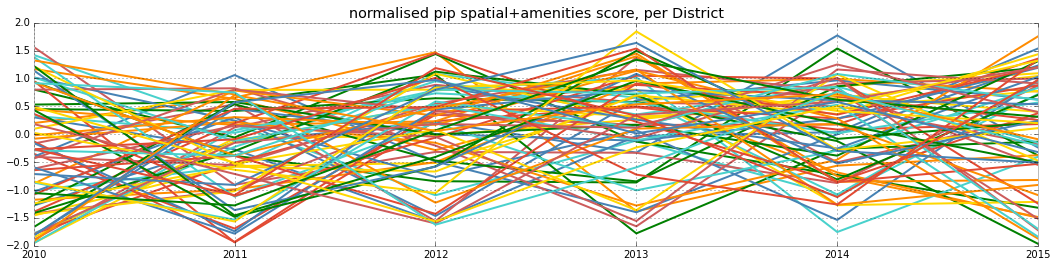

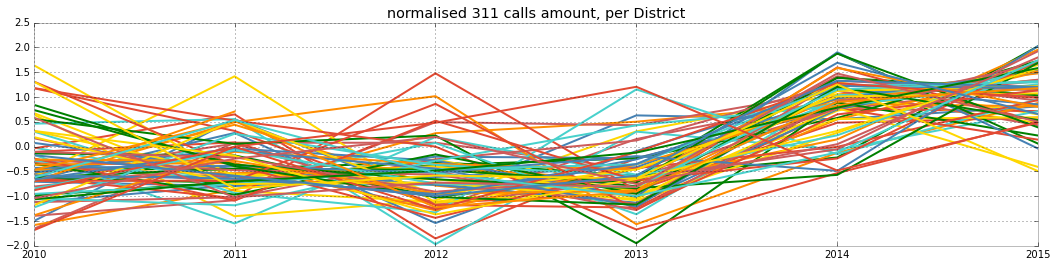

In [70]:
pip_n.T.plot(legend=0, figsize=(18,4), title='normalised pip spatial+amenities score, per District')
calls_n.T.plot(legend=0, figsize=(18,4), title='normalised 311 calls amount, per District')

------------------

## actually logically there should be a negative corellation, but...

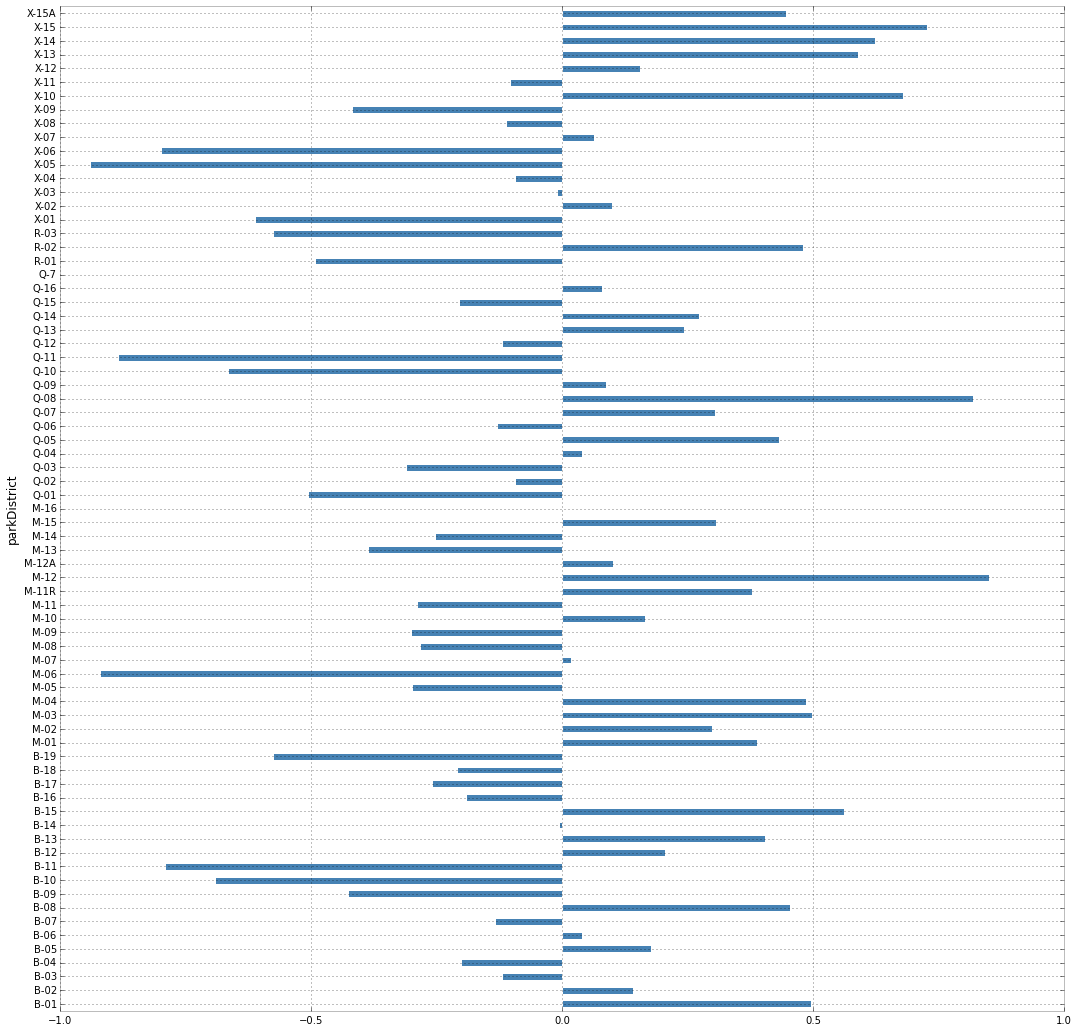

In [77]:
calls_n.corrwith(pip_n, axis=1).plot(kind='barh', figsize=(18,18))